# **`Imports:`**




In [82]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn import preprocessing 
label = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
import datetime as dt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
import math
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_squared_error


# *Read* Train **Data**:

In [83]:
train_data= pd.read_csv('Train.csv')
train_data.head(10)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,1/1/2018 0:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,1/1/2018 0:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,1/1/2018 0:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,1/1/2018 1:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,1/1/2018 1:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
5,1/1/2018 1:30,3.28,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load
6,1/1/2018 1:45,3.60,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load
7,1/1/2018 2:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load
8,1/1/2018 2:15,3.28,3.64,0.0,0.0,66.94,100.0,8100,Weekday,Monday,Light_Load
9,1/1/2018 2:30,3.78,4.72,0.0,0.0,62.51,100.0,9000,Weekday,Monday,Light_Load


In [84]:
train_data.shape

(27999, 11)

# **preprocessing Train Data**:

In [85]:
train_data.isna().sum()

date                                       0
Usage_kWh                                  0
Lagging_Current_Reactive.Power_kVarh       0
Leading_Current_Reactive_Power_kVarh     119
CO2(tCO2)                                  0
Lagging_Current_Power_Factor               0
Leading_Current_Power_Factor              76
NSM                                        0
WeekStatus                              1774
Day_of_week                             1774
Load_Type                                  0
dtype: int64

In [86]:
train_data['Leading_Current_Reactive_Power_kVarh'].describe()

count    27880.000000
mean         3.881065
std          7.495718
min          0.000000
25%          0.000000
50%          0.000000
75%          2.230000
max         27.760000
Name: Leading_Current_Reactive_Power_kVarh, dtype: float64

In [87]:
train_data['Leading_Current_Reactive_Power_kVarh'].fillna(method='ffill', inplace=True) # Fill null values with forward fill

In [88]:
train_data['Leading_Current_Power_Factor'].describe()

count    27923.000000
mean        84.479796
std         30.422037
min         12.500000
25%         99.810000
50%        100.000000
75%        100.000000
max        100.000000
Name: Leading_Current_Power_Factor, dtype: float64

In [89]:
train_data['Leading_Current_Power_Factor'].fillna(method='ffill', inplace=True) # Fill null values with forward fill

In [90]:
train_data['WeekStatus'].describe()

count       26225
unique          2
top       Weekday
freq        18929
Name: WeekStatus, dtype: object

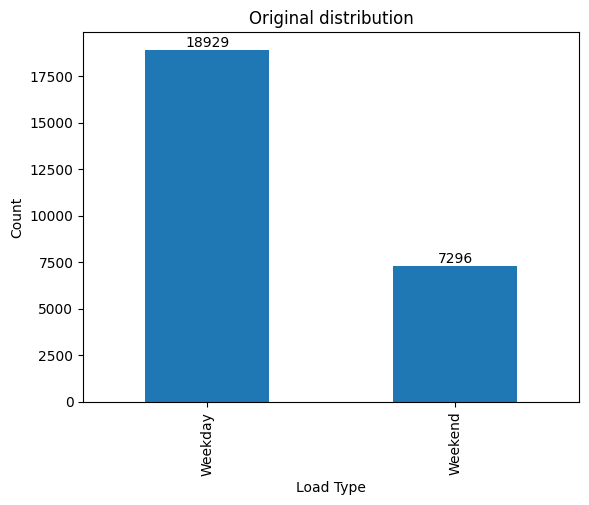

In [91]:
ax = train_data['WeekStatus'].value_counts().plot(kind='bar')
plt.title('Original distribution')
plt.xlabel('Load Type')
plt.ylabel('Count')
for i, count in enumerate(train_data['WeekStatus'].value_counts()):
    ax.text(i, count+1, str(count), ha='center', va='bottom')

plt.show()

In [92]:
train_data['WeekStatus'].fillna('Weekday', inplace=True) # Fill null values with top value in dataset

In [93]:
train_data['Day_of_week'].describe()

count       26225
unique          7
top       Tuesday
freq         3840
Name: Day_of_week, dtype: object

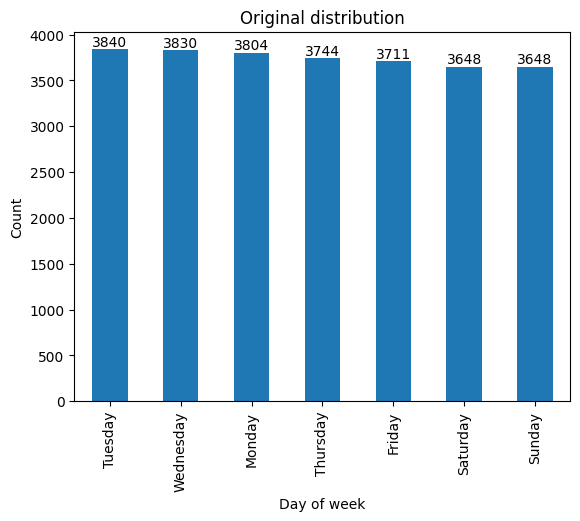

In [94]:
ax = train_data['Day_of_week'].value_counts().plot(kind='bar')
plt.title('Original distribution')
plt.xlabel('Day of week')
plt.ylabel('Count')

# Annotate the bars with their counts
for i, count in enumerate(train_data['Day_of_week'].value_counts()):
    ax.text(i, count+1, str(count), ha='center', va='bottom')

plt.show()

In [95]:
# Convert 'date' column to datetime format
train_data['date'] = pd.to_datetime(train_data['date'])

# Fill null values in 'day_of_week' column using 'date' column
train_data['Day_of_week'] = train_data['Day_of_week'].fillna(train_data['date'].dt.day_name())

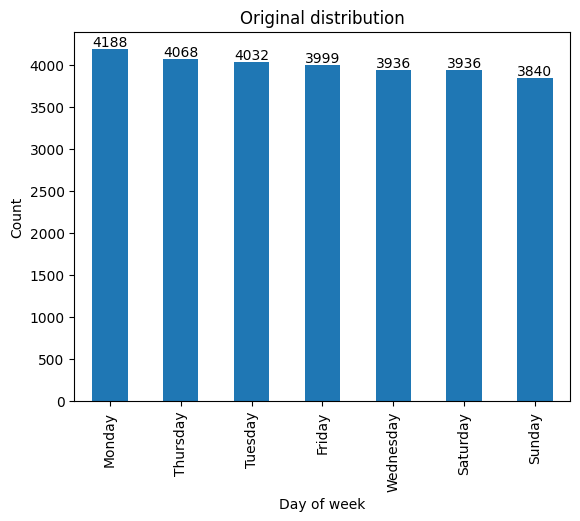

In [96]:
# Create a bar plot of the distribution after filling in missing values
ax = train_data['Day_of_week'].value_counts().plot(kind='bar')
plt.title('Original distribution')
plt.xlabel('Day of week')
plt.ylabel('Count')

# Annotate the bars with their counts
for i, count in enumerate(train_data['Day_of_week'].value_counts()):
    ax.text(i, count+1, str(count), ha='center', va='bottom')

plt.show()

In [97]:
train_data['Load_Type'].describe()

count          27999
unique             3
top       Light_Load
freq           14364
Name: Load_Type, dtype: object

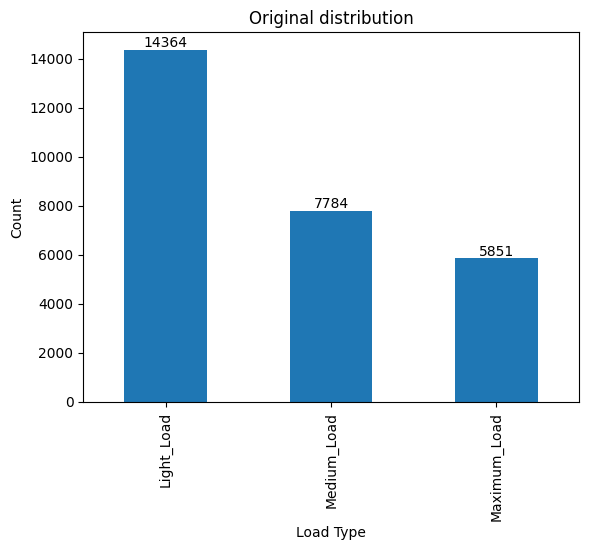

In [98]:
ax = train_data['Load_Type'].value_counts().plot(kind='bar')
plt.title('Original distribution')
plt.xlabel('Load Type')
plt.ylabel('Count')
for i, count in enumerate(train_data['Load_Type'].value_counts()):
    ax.text(i, count+1, str(count), ha='center', va='bottom')

plt.show()

In [99]:
train_data.isna().sum()


date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [100]:
train_data.shape

(27999, 11)

# **Feature Engineering**

In [101]:
# Convert the date and time column to datetime format
train_data['date'] = pd.to_datetime(train_data['date'])
# Calculate the Unix timestamp in seconds
train_data['unix_timestamp'] = (train_data['date'] - dt.datetime(1970,1,1)).dt.total_seconds()
# Drop the original datetime column if desired
train_data = train_data.drop('date', axis=1)

**encoding**


In [102]:
train_data = pd.get_dummies(train_data, columns=['Day_of_week'])
train_data = pd.get_dummies(train_data, columns=['WeekStatus'])

In [103]:
train_data['Load_Type']= label.fit_transform(train_data['Load_Type'])
#train_data['date']= label.fit_transform(train_data['date'])

In [104]:
train_data.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type,unix_timestamp,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,WeekStatus_Weekday,WeekStatus_Weekend
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1.514766e+09,0,1,0,0,0,0,0,1,0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1.514767e+09,0,1,0,0,0,0,0,1,0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1.514768e+09,0,1,0,0,0,0,0,1,0
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1.514768e+09,0,1,0,0,0,0,0,1,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1.514769e+09,0,1,0,0,0,0,0,1,0


# **Spliting Data**

In [105]:
train_data.shape

(27999, 18)

In [106]:
Y = train_data['Usage_kWh']
train_data.drop(['Usage_kWh'], axis = 1, inplace = True)

In [107]:
train_data.shape

(27999, 17)

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data, Y, test_size = 0.2, random_state = 0)


# **Train Model**

Linear Regression

In [109]:
regressor1 = LinearRegression()
regressor1.fit(X_train, Y_train)
y_pred = regressor1.predict(X_test)
score2 = round(regressor1.score(X_train, Y_train) * 100, 2)
print("Train Score",score2)
print('Mean Absolute Error : ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error : ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(Y_test, y_pred)))


Train Score 97.98
Mean Absolute Error :  2.7629682485506573
Mean Squared Error :  27.706210630063204
Root Mean Squared Error :  5.263668932414272


In [110]:
regressor2 = LinearRegression(fit_intercept= True ,positive = False, copy_X= False)
regressor2.fit(X_train, Y_train)
y_pred = regressor2.predict(X_test)
score2 = round(regressor2.score(X_train, Y_train) * 100, 2)
print("Train Score",score2)
print('Mean Absolute Error : ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error : ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(Y_test, y_pred)))


Train Score 97.98
Mean Absolute Error :  2.7629682485506573
Mean Squared Error :  27.706210630063204
Root Mean Squared Error :  5.263668932414272


Ridge Model

In [111]:
from sklearn.linear_model import Ridge

regressor3 = Ridge()
regressor3.fit(X_train, Y_train)
y_pred2 = regressor3.predict(X_test)
score2 = round(regressor3.score(X_train, Y_train) * 100, 2)
print("Train Score",score2)
print('Mean Absolute Error : ', metrics.mean_absolute_error(Y_test, y_pred2))
print('Mean Squared Error : ', metrics.mean_squared_error(Y_test, y_pred2))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(Y_test, y_pred2)))

Train Score 95.45
Mean Absolute Error :  5.163183064253878
Mean Squared Error :  54.9138509858108
Root Mean Squared Error :  7.410388045562176


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.94646e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [112]:
from sklearn.linear_model import Ridge

regressor4 = Ridge(alpha= 0.0001)
regressor4.fit(X_train, Y_train)
y_pred2 = regressor4.predict(X_test)
score2 = round(regressor4.score(X_train, Y_train) * 100, 2)
print("Train Score",score2)
print('Mean Absolute Error : ', metrics.mean_absolute_error(Y_test, y_pred2))
print('Mean Squared Error : ', metrics.mean_squared_error(Y_test, y_pred2))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(Y_test, y_pred2)))

Train Score 97.98
Mean Absolute Error :  2.763206347283567
Mean Squared Error :  27.70538982340548
Root Mean Squared Error :  5.263590962774889


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.95404e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [113]:
from sklearn import linear_model

regressor5 = linear_model.Lasso()
regressor5.fit(X_train, Y_train)
y_pred2 = regressor5.predict(X_test)
score2 = round(regressor5.score(X_train, Y_train) * 100, 2)
print("Train Score",score2)
print('Mean Absolute Error : ', metrics.mean_absolute_error(Y_test, y_pred2))
print('Mean Squared Error : ', metrics.mean_squared_error(Y_test, y_pred2))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(Y_test, y_pred2)))

Train Score 91.22
Mean Absolute Error :  7.099497210180483
Mean Squared Error :  103.25318926732308
Root Mean Squared Error :  10.161357648824445


In [114]:
from sklearn import linear_model

regressor6 = linear_model.Lasso(alpha=0.0013)
regressor6.fit(X_train, Y_train)
y_pred2 = regressor6.predict(X_test)
score2 = round(regressor6.score(X_train, Y_train) * 100, 2)
print("Train Score",score2)
print('Mean Absolute Error : ', metrics.mean_absolute_error(Y_test, y_pred2))
print('Mean Squared Error : ', metrics.mean_squared_error(Y_test, y_pred2))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(Y_test, y_pred2)))

Train Score 97.97
Mean Absolute Error :  2.809286798110149
Mean Squared Error :  27.628916489712303
Root Mean Squared Error :  5.256321574039426


# **TEST** **Data**

In [115]:
test_data= pd.read_csv('Test.csv')
test_data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,19/10/2018 16:00,99.36,63.68,0.0,0.05,84.19,100.0,57600,Weekday,Friday,Maximum_Load
1,19/10/2018 16:15,88.49,54.18,0.0,0.04,85.28,100.0,58500,Weekday,Friday,Maximum_Load
2,19/10/2018 16:30,89.86,55.04,0.0,0.04,85.28,100.0,59400,Weekday,Friday,Maximum_Load
3,19/10/2018 16:45,56.66,36.40,0.0,0.03,84.13,100.0,60300,Weekday,Friday,Maximum_Load
4,19/10/2018 17:00,56.95,35.17,0.0,0.03,85.08,100.0,61200,Weekday,Friday,Maximum_Load


In [116]:
test_data.isna().sum()

date                                      0
Usage_kWh                                 0
Lagging_Current_Reactive.Power_kVarh      0
Leading_Current_Reactive_Power_kVarh      0
CO2(tCO2)                                 0
Lagging_Current_Power_Factor              0
Leading_Current_Power_Factor              0
NSM                                       0
WeekStatus                              692
Day_of_week                             692
Load_Type                                 0
dtype: int64

Preprosesing


In [117]:
# Convert 'date' column to datetime format
test_data['date'] = pd.to_datetime(test_data['date'])
# Fill null values in 'day_of_week' column using 'date' column
test_data['Day_of_week'] = test_data['Day_of_week'].fillna(test_data['date'].dt.day_name())

In [118]:
test_data['WeekStatus'].describe()

count        6349
unique          2
top       Weekday
freq         4449
Name: WeekStatus, dtype: object

In [119]:
test_data['WeekStatus'].fillna('Weekday', inplace=True) # Fill null values with top value in dataset

In [120]:
test_data.isna().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

encoding

In [121]:
# Convert the date and time column to datetime format
test_data['date'] = pd.to_datetime(test_data['date'])
# Calculate the Unix timestamp in seconds
test_data['unix_timestamp'] = (test_data['date'] - dt.datetime(1970,1,1)).dt.total_seconds()
# Drop the original datetime column if desired
test_data = test_data.drop('date', axis=1)

In [122]:
test_data = pd.get_dummies(test_data, columns=['Day_of_week'])
test_data = pd.get_dummies(test_data, columns=['WeekStatus'])
test_data['Load_Type']= label.transform(test_data['Load_Type'])


In [123]:
test_data.shape

(7041, 18)

split

In [124]:
y_test_2 = test_data['Usage_kWh']
test_data.drop(['Usage_kWh'], axis = 1, inplace = True)

In [125]:
test_data.shape

(7041, 17)

# **TEST Predict**

In [126]:
y_pred_2 = regressor1.predict(test_data)
print("**************Linear Regression**************")
print("*********************************************")
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test_2, y_pred_2))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test_2, y_pred_2))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2)))

**************Linear Regression**************
*********************************************
Mean Absolute Error :  2.357240578516122
Mean Squared Error :  12.460965993540668
Root Mean Squared Error :  3.5300093475146306


In [127]:
y_pred_2 = regressor2.predict(test_data)
print("**************Linear Regression with Hyperparameter Tuning***************")
print("*************************************************************************")
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test_2, y_pred_2))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test_2, y_pred_2))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2)))

**************Linear Regression with Hyperparameter Tuning***************
*************************************************************************
Mean Absolute Error :  2.357240578516122
Mean Squared Error :  12.460965993540668
Root Mean Squared Error :  3.5300093475146306


In [128]:
y_pred_2 = regressor3.predict(test_data)
print("**************Ridge**************")
print("*********************************")
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test_2, y_pred_2))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test_2, y_pred_2))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2)))

**************Ridge**************
*********************************
Mean Absolute Error :  4.753668010576897
Mean Squared Error :  37.13824688386373
Root Mean Squared Error :  6.09411575898126


In [129]:
y_pred_2 = regressor4.predict(test_data)
print("**************Ridge with Hyperparameter Tuning***************")
print("*************************************************************")
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test_2, y_pred_2))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test_2, y_pred_2))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2)))

**************Ridge with Hyperparameter Tuning***************
*************************************************************
Mean Absolute Error :  2.3575253196379804
Mean Squared Error :  12.461329149654558
Root Mean Squared Error :  3.5300607855466963


In [130]:
y_pred_2 = regressor5.predict(test_data)
print("**************Lasso**************")
print("*********************************")
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test_2, y_pred_2))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test_2, y_pred_2))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2)))

**************Lasso**************
*********************************
Mean Absolute Error :  6.800945049978805
Mean Squared Error :  83.33495555971625
Root Mean Squared Error :  9.128798144318685


In [131]:
y_pred_2 = regressor6.predict(test_data)
print("**************Lasso with Hyperparameter Tuning **************")
print("*************************************************************")
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test_2, y_pred_2))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test_2, y_pred_2))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2)))

**************Lasso with Hyperparameter Tuning **************
*************************************************************
Mean Absolute Error :  2.411598086793555
Mean Squared Error :  12.565338306355484
Root Mean Squared Error :  3.544762094464942
